In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
train_dataset = pd.read_csv('/content/drive/MyDrive/nsl-kdd/KDDTrain+.txt')
test_dataset=  pd.read_csv('/content/drive/MyDrive/nsl-kdd/KDDTest+.txt')

In [56]:
train_dataset.shape

(125972, 43)

In [5]:
train_dataset.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [57]:
train_dataset.columns

Index(['0', 'tcp', 'ftp_data', 'SF', '491', '0.1', '0.2', '0.3', '0.4', '0.5',
       '0.6', '0.7', '0.8', '0.9', '0.10', '0.11', '0.12', '0.13', '0.14',
       '0.15', '0.16', '0.17', '2', '2.1', '0.00', '0.00.1', '0.00.2',
       '0.00.3', '1.00', '0.00.4', '0.00.5', '150', '25', '0.17.1', '0.03',
       '0.17.2', '0.00.6', '0.00.7', '0.00.8', '0.05', '0.00.9', 'normal',
       '20'],
      dtype='object')

In [58]:
column_labels = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'attack_type','outcome']

In [59]:
train_dataset.columns=column_labels
test_dataset.columns=column_labels

In [9]:
train_dataset.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type', 'outcome'],
      dtype='object')

In [64]:
data_combined = pd.concat([train_dataset, test_dataset])

In [11]:
data_combined.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [61]:
data_combined["attack_type"].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


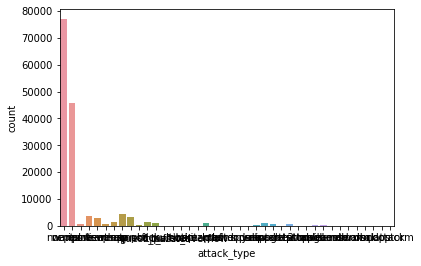

In [62]:
sns.countplot(x=data_combined["attack_type"])

In [65]:
attack_n = []
for i in data_combined.attack_type :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("intrusion attack")
data_combined['attack_type'] = attack_n 

In [66]:
data_combined['attack_type'] = np.where(data_combined['attack_type']!= 'normal', True, False)
data_combined

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,outcome
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,False,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,True,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,False,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,True,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,False,21
22539,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,False,21
22540,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,True,15
22541,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,False,21


In [68]:
data_combined['attack_type'].unique()

array([False,  True])

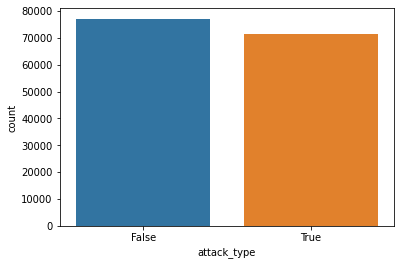

In [70]:
sns.countplot(x=data_combined["attack_type"])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


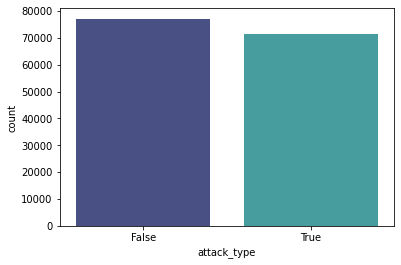

In [71]:
sns.countplot(data_combined.attack_type , palette = 'mako')

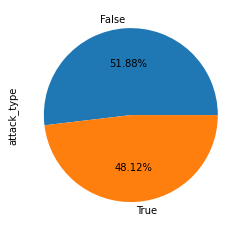

In [72]:
round(data_combined["attack_type"].value_counts()/data_combined.shape[0]*100,2).plot.pie(autopct="%1.2f%%")

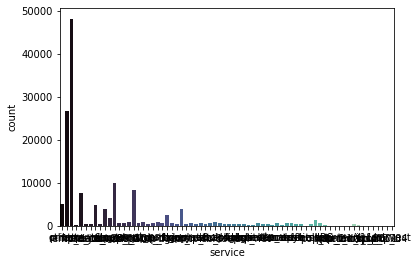

In [73]:
sns.countplot(x=data_combined["service"], palette = 'mako')

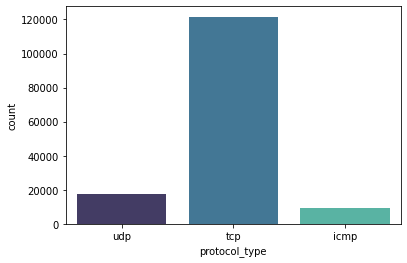

In [74]:
sns.countplot(x=data_combined["protocol_type"], palette = 'mako')

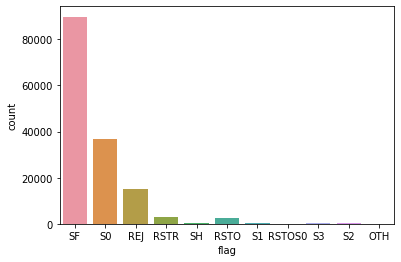

In [75]:
sns.countplot(x=data_combined["flag"])

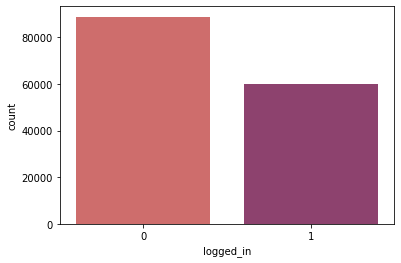

In [76]:
sns.countplot(x=data_combined["logged_in"],palette ="flare")

In [77]:
data_combined.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [78]:
data_combined.drop(columns='outcome',axis=1, inplace=True )

In [79]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()
data_combined['protocol_type'] = protocol_type_le.fit_transform(data_combined['protocol_type'])
data_combined['service'] = service_le.fit_transform(data_combined['service'])
data_combined['flag'] = flag_le.fit_transform(data_combined['flag'])

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
classes = data_combined['attack_type'].copy()
features = data_combined.drop(['attack_type'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(features,classes , test_size=0.3, random_state=40)

In [82]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data_combined.columns:
    if (data_combined[i].dtypes== 'object') :
        data_combined[i] = le.fit_transform(data_combined[i])

In [83]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148515 entries, 0 to 22542
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148515 non-null  int64  
 1   protocol_type                148515 non-null  int64  
 2   service                      148515 non-null  int64  
 3   flag                         148515 non-null  int64  
 4   src_bytes                    148515 non-null  int64  
 5   dst_bytes                    148515 non-null  int64  
 6   land                         148515 non-null  int64  
 7   wrong_fragment               148515 non-null  int64  
 8   urgent                       148515 non-null  int64  
 9   hot                          148515 non-null  int64  
 10  num_failed_logins            148515 non-null  int64  
 11  logged_in                    148515 non-null  int64  
 12  num_compromised              148515 non-null  int64  
 13  

In [84]:
X = data_combined.drop('attack_type', axis = 1)    
Y = data_combined['attack_type'].values

In [85]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(99505, 41) (49010, 41) (99505,) (49010,)


In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten

In [87]:
from tensorflow.keras.layers import BatchNormalization
model =Sequential()
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 30,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 1,activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [105]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history=model.fit(X_train, y_train,batch_size = 32, validation_data=(X_test, y_test),epochs =100,callbacks = [early_stop])

Epoch 1/100
3110/3110 [==============================] - 10s 3ms/step - loss: 0.2218 - accuracy: 0.9144 - val_loss: 0.1541 - val_accuracy: 0.9423
Epoch 2/100
3110/3110 [==============================] - 8s 3ms/step - loss: 0.2202 - accuracy: 0.9136 - val_loss: 0.1481 - val_accuracy: 0.9435
Epoch 3/100
3110/3110 [==============================] - 8s 3ms/step - loss: 0.2208 - accuracy: 0.9146 - val_loss: 0.1499 - val_accuracy: 0.9435
Epoch 4/100
3110/3110 [==============================] - 8s 3ms/step - loss: 0.2226 - accuracy: 0.9138 - val_loss: 0.1518 - val_accuracy: 0.9425
Epoch 5/100
3110/3110 [==============================] - 8s 3ms/step - loss: 0.2189 - accuracy: 0.9153 - val_loss: 0.1503 - val_accuracy: 0.9431
Epoch 6/100
3110/3110 [==============================] - 9s 3ms/step - loss: 0.2221 - accuracy: 0.9128 - val_loss: 0.1544 - val_accuracy: 0.9419
Epoch 7/100
3110/3110 [==============================] - 9s 3ms/step - loss: 0.2234 - accuracy: 0.9121 - val_loss: 0.1546 - val_a

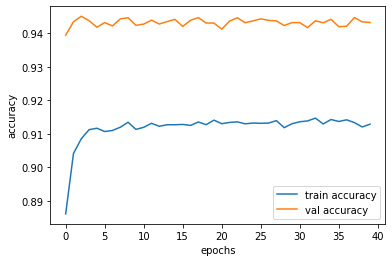

In [90]:
epochs = list(range(40))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

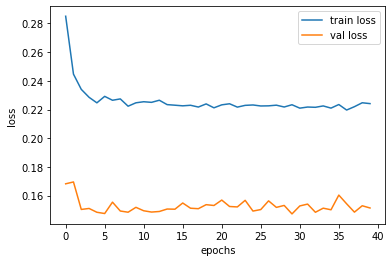

In [91]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
classes

In [ ]:
features

In [106]:
ypred=model.predict(X_test)

1532/1532 [==============================] - 2s 1ms/step


In [107]:
ypred = (ypred>0.5)

In [108]:
y_test

array([ True, False, False, ...,  True, False, False])

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

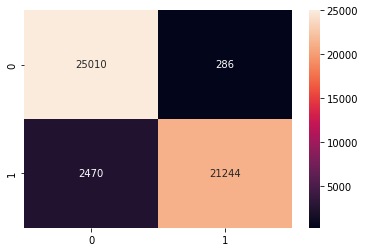

In [110]:
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt="d")

In [111]:
accuracy_score(y_test, ypred)

0.9437665782493369

In [112]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

       False       0.91      0.99      0.95     25296
        True       0.99      0.90      0.94     23714

    accuracy                           0.94     49010
   macro avg       0.95      0.94      0.94     49010
weighted avg       0.95      0.94      0.94     49010



In [113]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

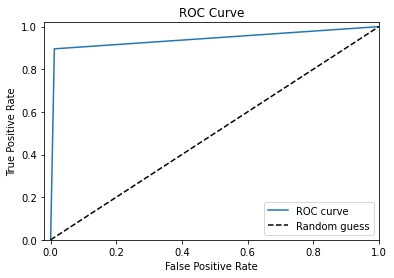

In [114]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [115]:
macro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged Precision score using sklearn library : {macro_averaged_precision}")

Macro-Averaged Precision score using sklearn library : 0.9484163291328372


In [116]:
micro_averaged_precision = metrics.precision_score(y_test, ypred, average = 'micro')
print(f"Micro-Averaged Precision score using sklearn library : {micro_averaged_precision}")

Micro-Averaged Precision score using sklearn library : 0.9437665782493369


In [117]:
macro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'macro')
print(f"Macro-averaged recall score using sklearn : {macro_averaged_recall}")

Macro-averaged recall score using sklearn : 0.9422679916111866


In [118]:
micro_averaged_recall = metrics.recall_score(y_test, ypred, average = 'micro')
print(f"Micro-Averaged recall score using sklearn library : {micro_averaged_recall}")

Micro-Averaged recall score using sklearn library : 0.9437665782493369


In [119]:
macro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'macro')
print(f"Macro-Averaged F1 score using sklearn library : {macro_averaged_f1}")

Macro-Averaged F1 score using sklearn library : 0.9434325696276509


In [120]:
micro_averaged_f1 = metrics.f1_score(y_test, ypred, average = 'micro')
print(f"Micro-Averaged F1 score using sklearn library : {micro_averaged_f1}")

Micro-Averaged F1 score using sklearn library : 0.9437665782493369
